# Finding Exoplanets through various methods



## Start with loading basic packages

In [8]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
#%matplotlib inline

df = pd.read_csv("../../exoTrain.csv")
df.head(6)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
5,2,211.10,163.57,179.16,187.82,188.46,168.13,203.46,178.65,166.49,...,-98.45,30.34,30.34,29.62,28.80,19.27,-43.90,-41.63,-52.90,-16.16


In [89]:
# there are 5087 observations(rows) and 3198 features(columns)

# Solve the problem using Principle Component Analysis (PCA)

## Standardize the Data

In [90]:
# store Flux 1-3192 in a matrix
x = df.iloc[:, 1:]
features = x.columns.values

In [91]:
# the matrix represents 5087 observations or candidates and 3197 different fluxes over time excluding the label feature
x_train = x.values #in matrix
x_train.shape
#print(x_train.shape)
#print(x_train)

(5087, 3197)

In [92]:
# store Label in a matrix
y_train = df.loc[:,['LABEL']].values
# the matrix represents 5087 observations or candidates and 1 Label column that consists of Label 1 as confirmed non-exoplanet
# and Label 2 as confirmed exoplanet 
#print(y_train.shape)
#print(y_train)


In [93]:
time = np.arange(3197)
print(time)

[   0    1    2 ... 3194 3195 3196]


<IPython.core.display.Javascript object>


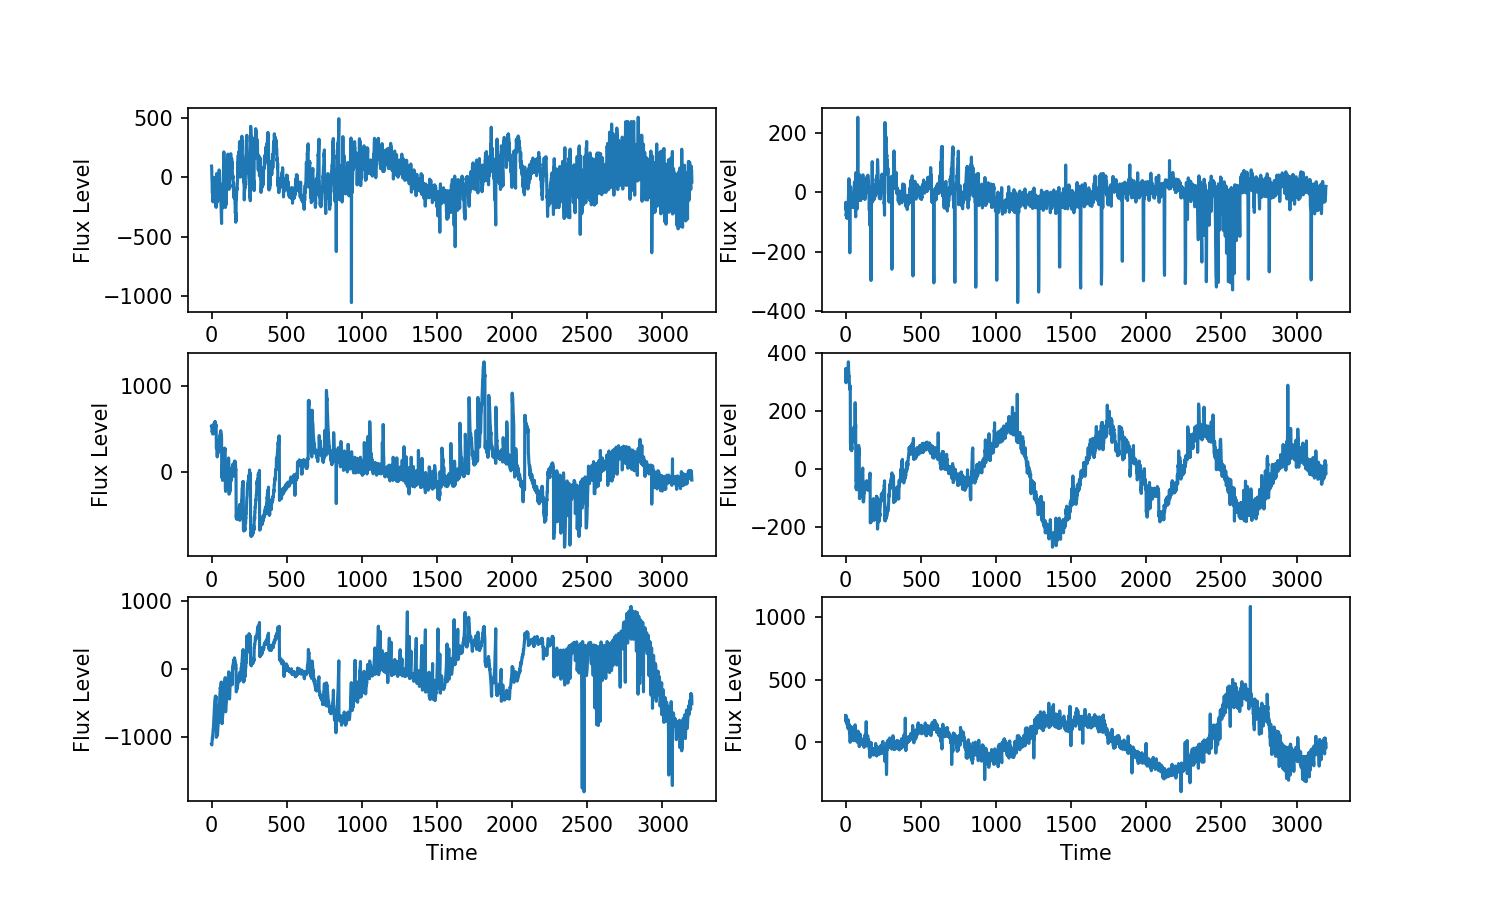

In [94]:
fig = plt.figure(figsize=(10, 6))

for i in range(6):
    ax = fig.add_subplot(3, 2, i+1)
    ax.plot(time, x_train[i,:])
    ax.set_xlabel('Time')
    ax.set_ylabel('Flux Level')

<IPython.core.display.Javascript object>


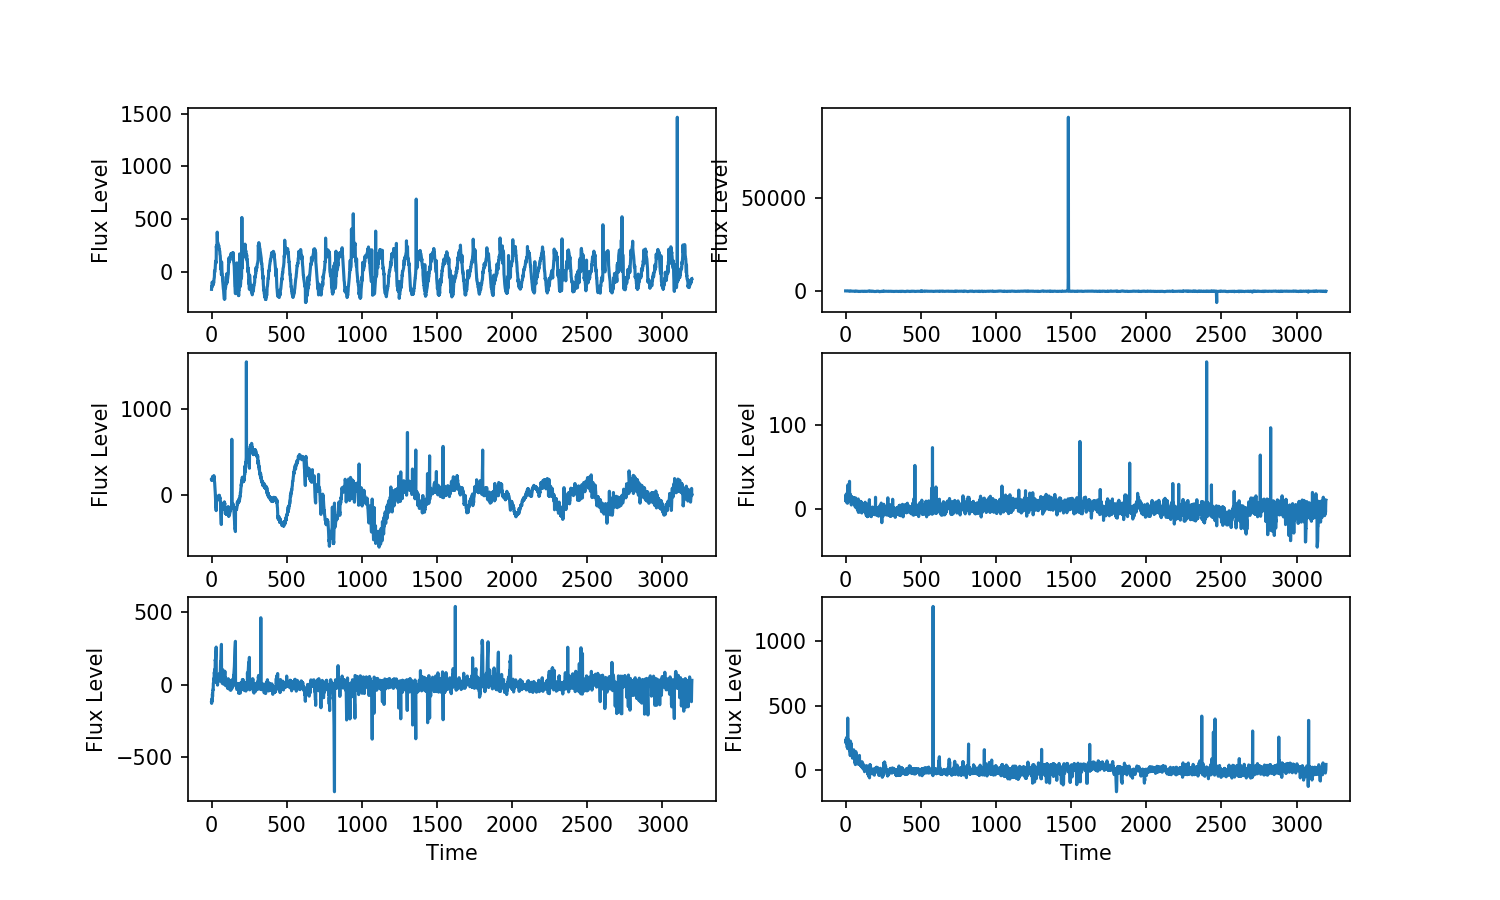

In [95]:
fig = plt.figure(figsize=(10, 6))

for i in range(6):
    ax = fig.add_subplot(3, 2, i+1)
    ax.plot(time, x_train[i+40,:])
    ax.set_xlabel('Time')
    ax.set_ylabel('Flux Level')

<IPython.core.display.Javascript object>


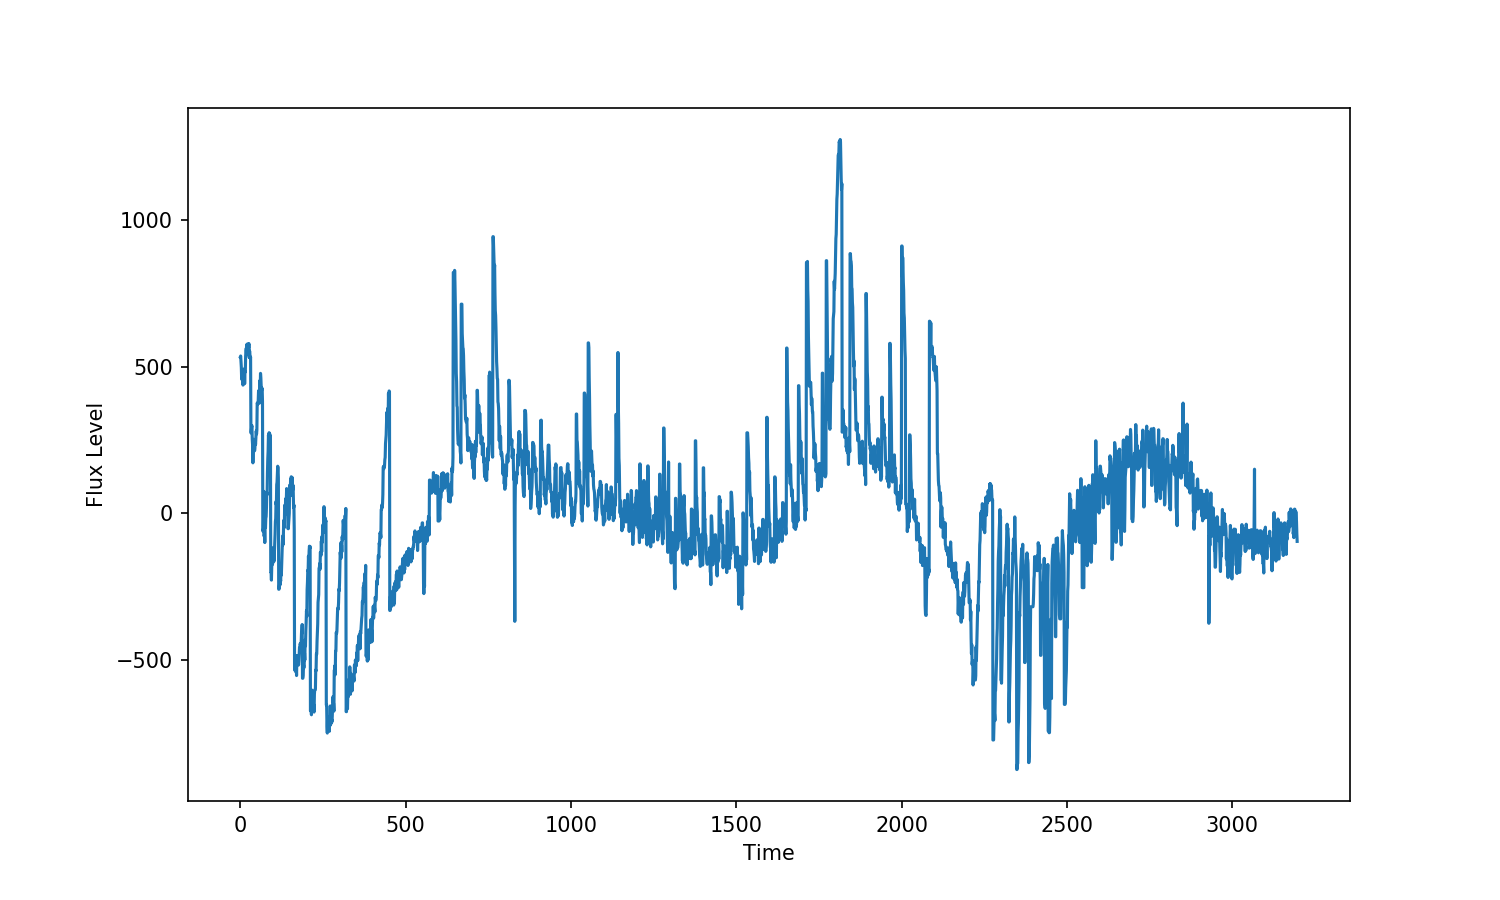

Text(0, 0.5, 'Flux Level')

In [96]:
plt.figure(figsize=(10, 6))
plt.plot(time, x_train[2,:])
plt.xlabel('Time')
plt.ylabel('Flux Level')

<IPython.core.display.Javascript object>


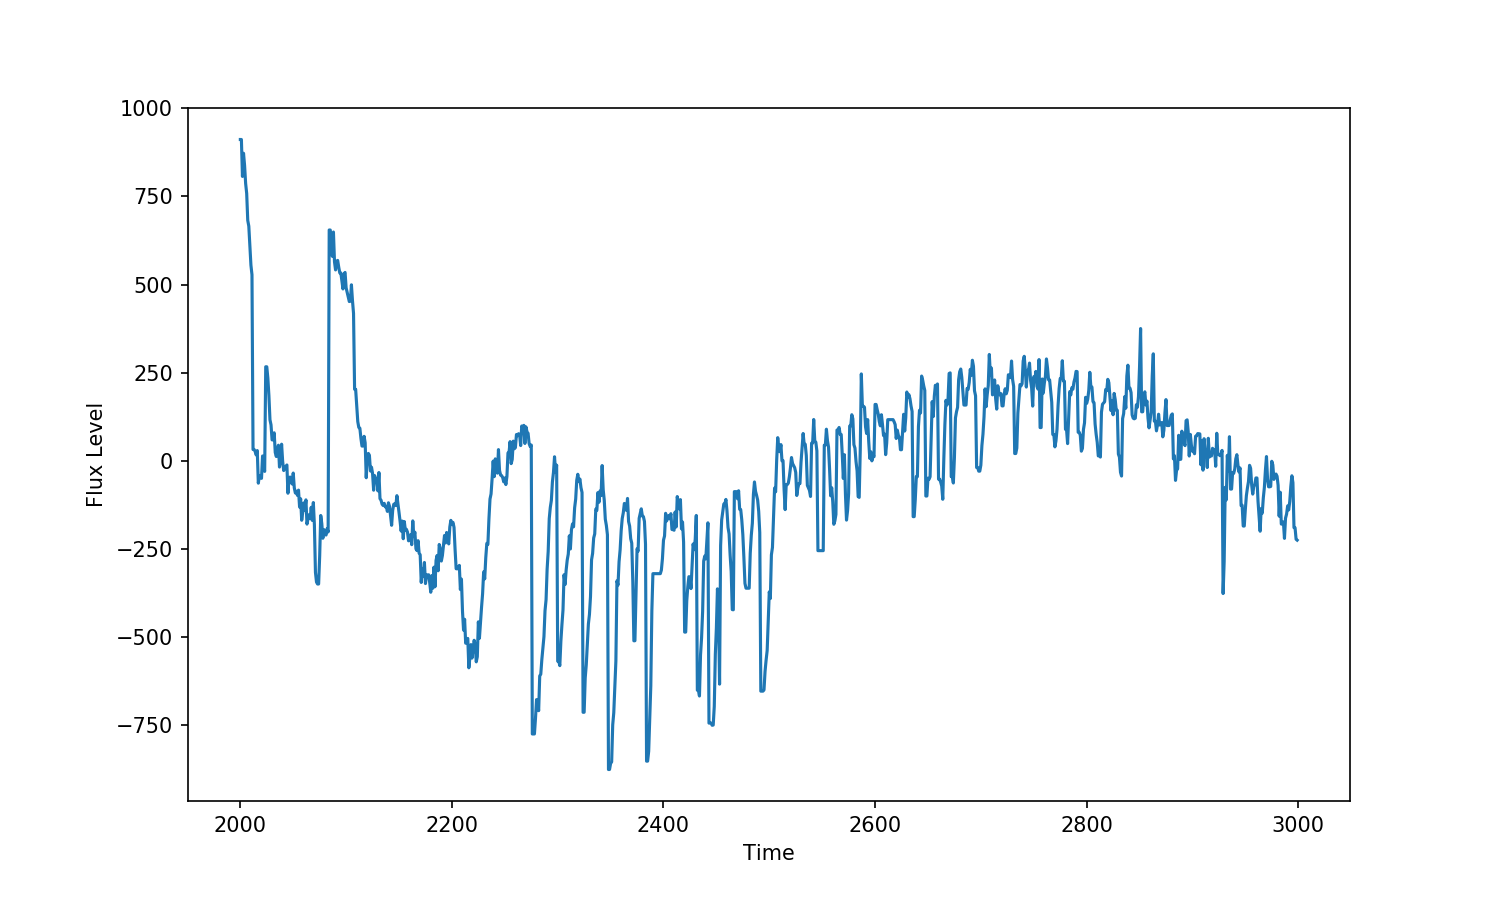

Text(0, 0.5, 'Flux Level')

In [97]:
plt.figure(figsize=(10, 6))
plt.plot(time[2000:3000], x_train[2, 2000:3000])
plt.xlabel('Time')
plt.ylabel('Flux Level')

<IPython.core.display.Javascript object>


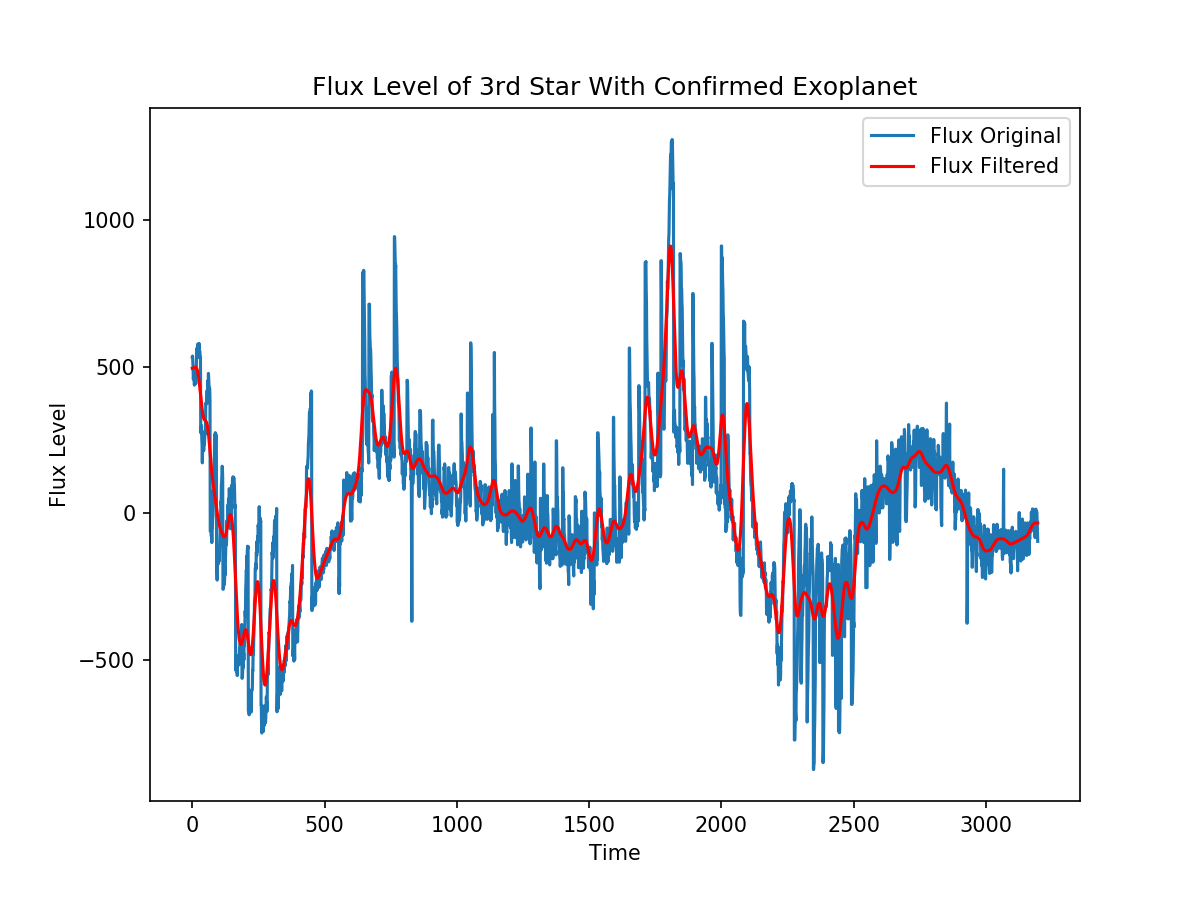

Text(0.5, 1.0, 'Flux Level of 3rd Star With Confirmed Exoplanet')

In [98]:
from scipy import ndimage
from scipy.ndimage import gaussian_filter

flux_original = x_train[2,:]
flux_filtered = ndimage.filters.gaussian_filter(flux_original, sigma=11)

plt.figure(figsize=(8,6))
plt.plot(time, flux_original, label='Flux Original')
plt.plot(time, flux_filtered, '-r', label='Flux Filtered')
plt.legend(loc='upper right')
plt.xlabel('Time')
plt.ylabel('Flux Level')
plt.title('Flux Level of 3rd Star With Confirmed Exoplanet')

<IPython.core.display.Javascript object>


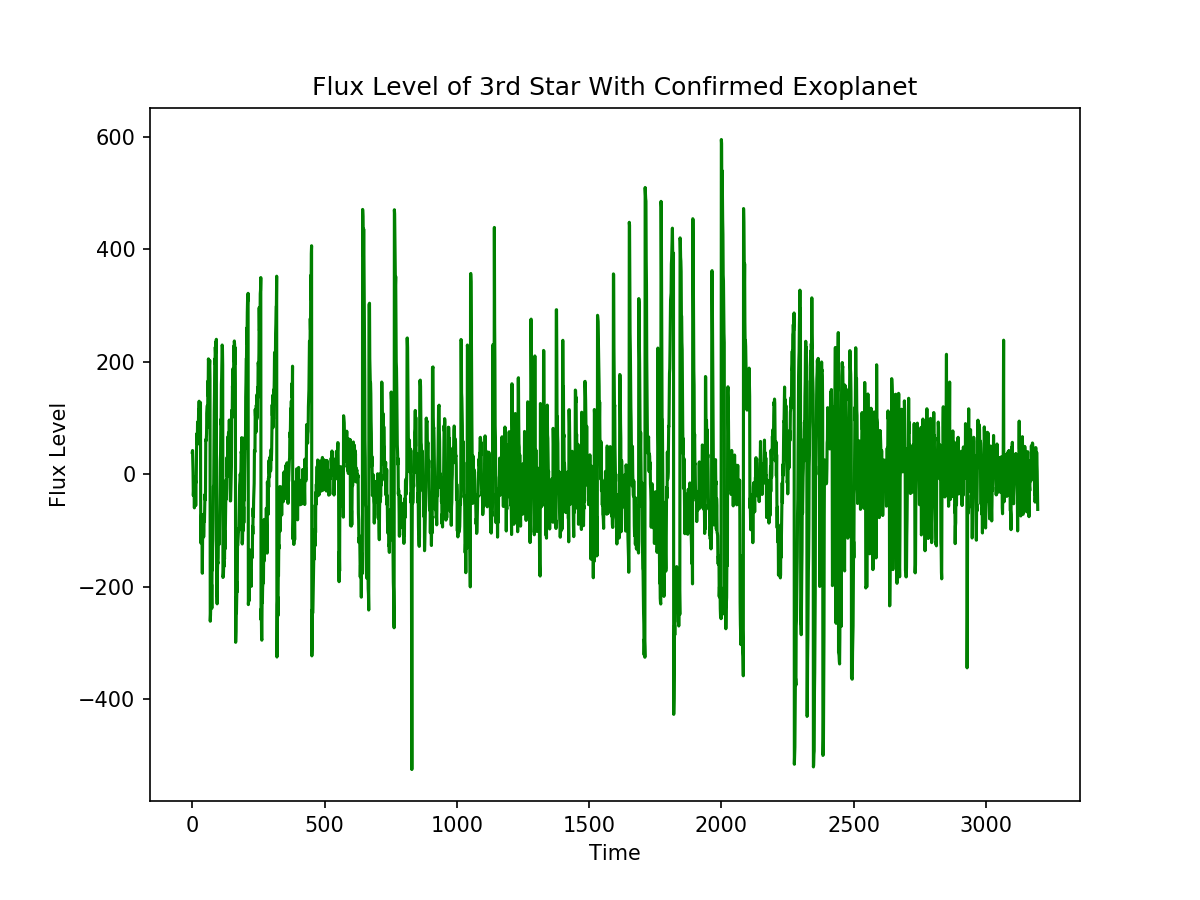

Text(0.5, 1.0, 'Flux Level of 3rd Star With Confirmed Exoplanet')

In [99]:
flux_detrend = flux_original - flux_filtered


plt.figure(figsize=(8,6))
plt.plot(time, flux_detrend, '-g', label='Flux Detrend')
#plt.plot(time, flux_original, label='Flux Original')
#plt.plot(time, flux_filtered, '-r', label='Flux Filtered')
#plt.legend(loc='upper right')
plt.xlabel('Time')
plt.ylabel('Flux Level')
plt.title('Flux Level of 3rd Star With Confirmed Exoplanet')

In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

def detrender_normalizer(X):
    flux_original = X
    flux_filtered = ndimage.filters.gaussian_filter(flux_original, sigma=11)
    flux_detrend = flux_original - flux_filtered
    flux_normalized = (flux_detrend-np.mean(flux_detrend)) / (np.max(flux_detrend)-np.min(flux_detrend))
    return flux_normalized

In [101]:
df.iloc[:, 1:] = df.iloc[:, 1:].apply(detrender_normalizer,axis=1)
flux_norm = df.iloc[:,1:].values
df.head()
#print(flux_norm)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,0.108320,0.101905,0.060207,0.029723,0.022260,-0.033026,-0.038745,-0.011656,0.000653,...,-0.044580,-0.061863,-0.063051,0.020120,0.034758,0.063130,0.027358,0.041557,0.004008,-0.025648
1,2,0.037887,0.046987,0.000318,0.033764,-0.040569,-0.030018,-0.057496,-0.057403,-0.057350,...,0.008094,-0.046500,-0.047126,-0.034048,0.002783,0.012836,-0.010725,0.022856,0.040458,0.047694
2,2,0.034564,0.037404,0.017429,0.002178,-0.034259,-0.026106,-0.027853,-0.008738,-0.053623,...,-0.033828,0.041953,0.041913,0.003348,0.011402,0.034581,0.019563,0.004321,-0.032348,-0.056121
3,2,0.019674,0.081463,-0.051379,-0.063438,-0.004877,-0.018902,0.010744,-0.020231,-0.014877,...,0.039275,0.009932,0.008608,0.107240,0.076591,-0.020922,-0.010113,-0.035892,-0.036375,0.056022
4,2,-0.067010,-0.069993,-0.074146,-0.066668,-0.054292,-0.048517,-0.038003,-0.052832,-0.044581,...,-0.034955,0.041262,0.038795,0.054804,0.017460,0.018000,0.032617,0.037813,0.026043,-0.014738


<IPython.core.display.Javascript object>


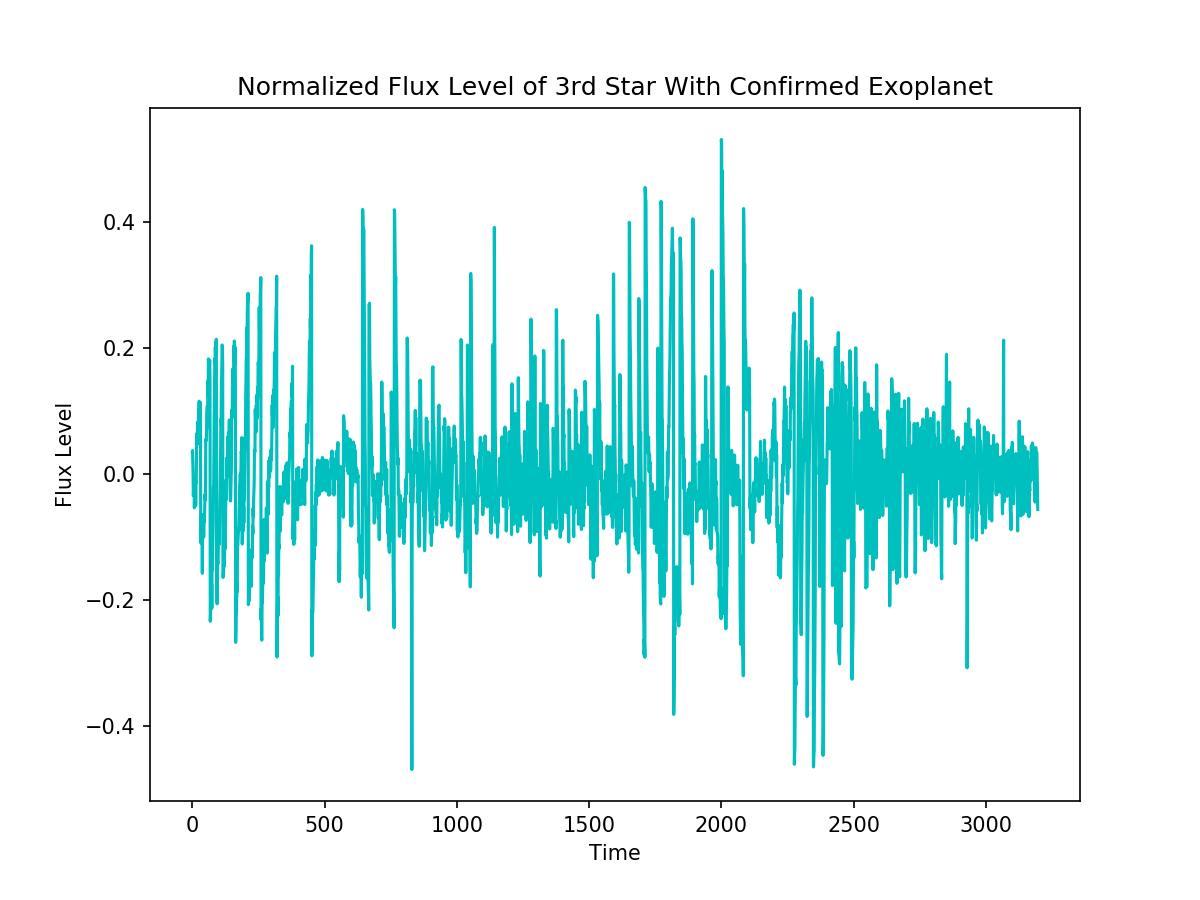

Text(0.5, 1.0, 'Normalized Flux Level of 3rd Star With Confirmed Exoplanet')

In [102]:
plt.figure(figsize=(8,6))
plt.plot(time, flux_norm[2,:], '-c', label='Flux Normalized')
plt.xlabel('Time')
plt.ylabel('Flux Level')
plt.title('Normalized Flux Level of 3rd Star With Confirmed Exoplanet')

In [103]:
def reduce_upper_outliers(df,reduce = 0.01, half_width=4):
    '''
    Since we are looking at dips in the data, we should remove upper outliers.
    The function is taken from here:
    https://www.kaggle.com/muonneutrino/exoplanet-data-visualization-and-exploration
    '''
    length = len(df.iloc[0,:])
    remove = int(length*reduce)
    for i in df.index.values:
        values = df.loc[i,:]
        sorted_values = values.sort_values(ascending = False)
       # print(sorted_values[:30])
        for j in range(remove):
            idx = sorted_values.index[j]
            #print(idx)
            new_val = 0
            count = 0
            idx_num = int(idx[5:])
            #print(idx,idx_num)
            for k in range(2*half_width+1):
                idx2 = idx_num + k - half_width
                if idx2 <1 or idx2 >= length or idx_num == idx2:
                    continue
                new_val += values['FLUX.'+str(idx2)] # corrected from 'FLUX-' to 'FLUX.'
                
                count += 1
            new_val /= count # count will always be positive here
            #print(new_val)
            if new_val < values[idx]: # just in case there's a few persistently high adjacent values
                #df.set_value(i,idx,new_val) deprecated use.at[] or .iat[] instead
                df.at[i, idx] = new_val
        
            
    return df

In [104]:
df.iloc[:, 1:] = reduce_upper_outliers(df.iloc[:, 1:])
df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,0.108320,0.101905,0.060207,0.029723,0.022260,-0.033026,-0.038745,-0.011656,0.000653,...,-0.044580,-0.061863,-0.063051,0.020120,0.034758,0.063130,0.027358,0.041557,0.004008,-0.025648
1,2,0.037887,0.046987,0.000318,0.033764,-0.040569,-0.030018,-0.057496,-0.057403,-0.057350,...,0.008094,-0.046500,-0.047126,-0.034048,0.002783,0.012836,-0.010725,0.022856,0.040458,0.047694
2,2,0.034564,0.037404,0.017429,0.002178,-0.034259,-0.026106,-0.027853,-0.008738,-0.053623,...,-0.033828,0.041953,0.041913,0.003348,0.011402,0.034581,0.019563,0.004321,-0.032348,-0.056121
3,2,0.019674,0.081463,-0.051379,-0.063438,-0.004877,-0.018902,0.010744,-0.020231,-0.014877,...,0.039275,0.009932,0.008608,0.107240,0.076591,-0.020922,-0.010113,-0.035892,-0.036375,0.056022
4,2,-0.067010,-0.069993,-0.074146,-0.066668,-0.054292,-0.048517,-0.038003,-0.052832,-0.044581,...,-0.034955,0.041262,0.038795,0.054804,0.017460,0.018000,0.032617,0.037813,0.026043,-0.014738


In [105]:
pca = PCA().fit(df.iloc[:,1:])

<IPython.core.display.Javascript object>


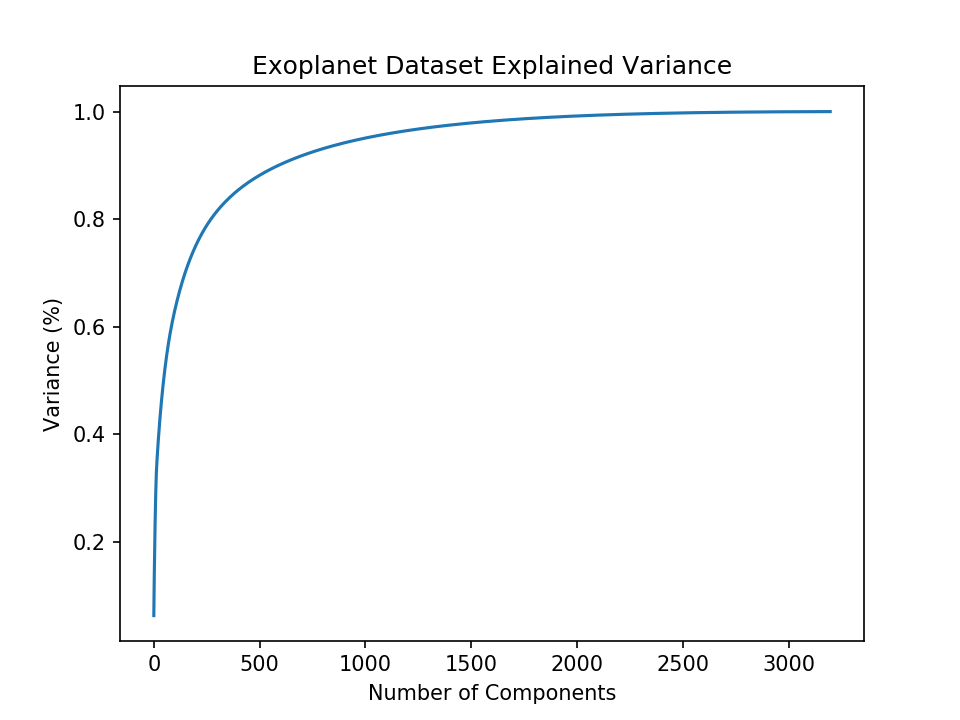

In [106]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Exoplanet Dataset Explained Variance')
plt.show()

<IPython.core.display.Javascript object>


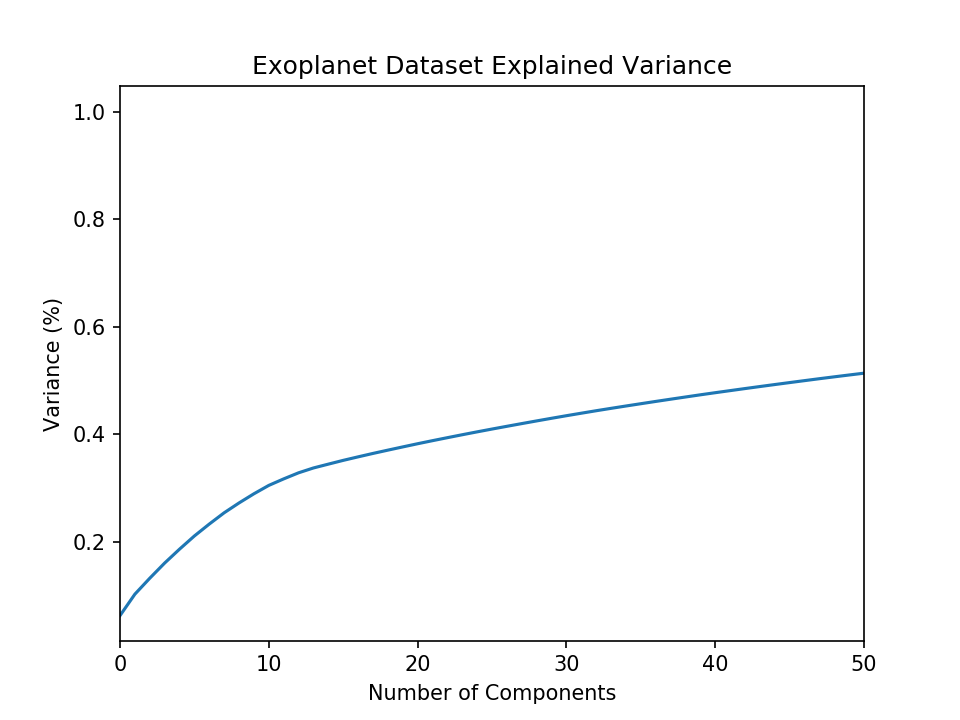

In [107]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0, 50)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Exoplanet Dataset Explained Variance')
plt.show()

In [108]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(df.iloc[:,1:], df.iloc[:,0])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [109]:
df_test = pd.read_csv("../../exoTest.csv")
df_test.head(6)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,2,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,2,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,2,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84
5,1,14.28,10.63,14.56,12.42,12.07,12.92,12.27,3.19,8.47,...,3.86,-4.06,-3.56,-1.13,-7.18,-4.78,-4.34,7.67,-0.33,-7.53


In [110]:
df_test.iloc[:, 1:] = df_test.iloc[:, 1:].apply(detrender_normalizer,axis=1)
df_test.iloc[:, 1:] = reduce_upper_outliers(df_test.iloc[:, 1:])
df_test.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,0.115235,0.196665,0.159224,0.055563,0.049487,0.031981,-0.024472,-0.055467,-0.055538,...,-0.065140,-0.054988,-0.071221,-0.118202,-0.079134,0.007880,-0.031257,-0.021840,-0.031088,0.037586
1,2,0.048653,0.046733,0.049623,0.050200,0.051209,0.052671,0.056911,0.057917,0.062347,...,0.021625,-0.006439,-0.022833,-0.048371,-0.063157,-0.079049,-0.092820,-0.099110,-0.092982,-0.073184
2,2,0.423066,0.358798,0.304845,0.262772,0.310815,0.204222,0.153883,0.083775,-0.073256,...,0.050492,-0.026207,-0.019983,-0.031022,-0.054090,-0.157481,-0.065606,-0.141189,0.002991,0.080182
3,2,-0.027100,-0.027760,-0.034009,-0.031721,-0.005205,-0.018420,-0.021936,-0.010089,-0.000827,...,0.070011,0.059529,0.058174,0.049641,0.030706,0.033230,0.032441,-0.010966,-0.052902,-0.040230
4,2,-0.012200,-0.001464,0.001564,0.002803,-0.001655,-0.005274,0.005215,-0.014869,0.003389,...,0.012504,0.001241,0.016600,0.018943,0.012901,-0.010794,-0.009284,-0.000641,-0.004112,0.019181


In [111]:
predicted = logisticRegr.predict(df_test.iloc[:, 1:])
#df_test = df_test.replace(1,'Non-Exoplanet')
#df_test = df_test.replace(2,'Exoplanet')
logisticRegr.score(df_test.iloc[:, 1:] , df_test.iloc[:, 0])
actual = df_test.iloc[:, 0]

In [112]:
target_actual = pd.Series(actual, name='Actual')
target_predicted = pd.Series(predicted, name='Predicted')
df_confusion = pd.crosstab(target_actual, target_predicted)

In [113]:
df_confusion

Predicted,1
Actual,
1,565
2,5


In [116]:
df.LABEL.value_counts()

1    5050
2      37
Name: LABEL, dtype: int64

In [117]:
df_test.LABEL.value_counts()

1    565
2      5
Name: LABEL, dtype: int64

In [10]:
from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'imblearn'

In [6]:
plt.figure()
plt.plot(time, x_train[153,:])
plt.xlabel('Time')
plt.ylabel('Flux Level')
plt.title('Non-Exoplanet Flux Graph')
plt.show()

NameError: name 'plt' is not defined

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=[0,1])
data_rescaled = scaler.fit_transform(x_train)
data_rescaled

array([[0.13673478, 0.17838747, 0.16207309, ..., 0.77224094, 0.77152869,
        0.75266417],
       [0.13665516, 0.17832096, 0.16202821, ..., 0.77218296, 0.77154071,
        0.75273377],
       [0.13699799, 0.17864307, 0.16235477, ..., 0.77214565, 0.77144603,
        0.75259731],
       ...,
       [0.13684248, 0.17849725, 0.16221097, ..., 0.77226942, 0.77161012,
        0.7528034 ],
       [0.13668078, 0.17834126, 0.16205974, ..., 0.7721608 , 0.77151604,
        0.75270746],
       [0.1368724 , 0.17851329, 0.1622289 , ..., 0.77215851, 0.77150759,
        0.752743  ]])

In [28]:
pca = PCA().fit(data_rescaled)

<IPython.core.display.Javascript object>


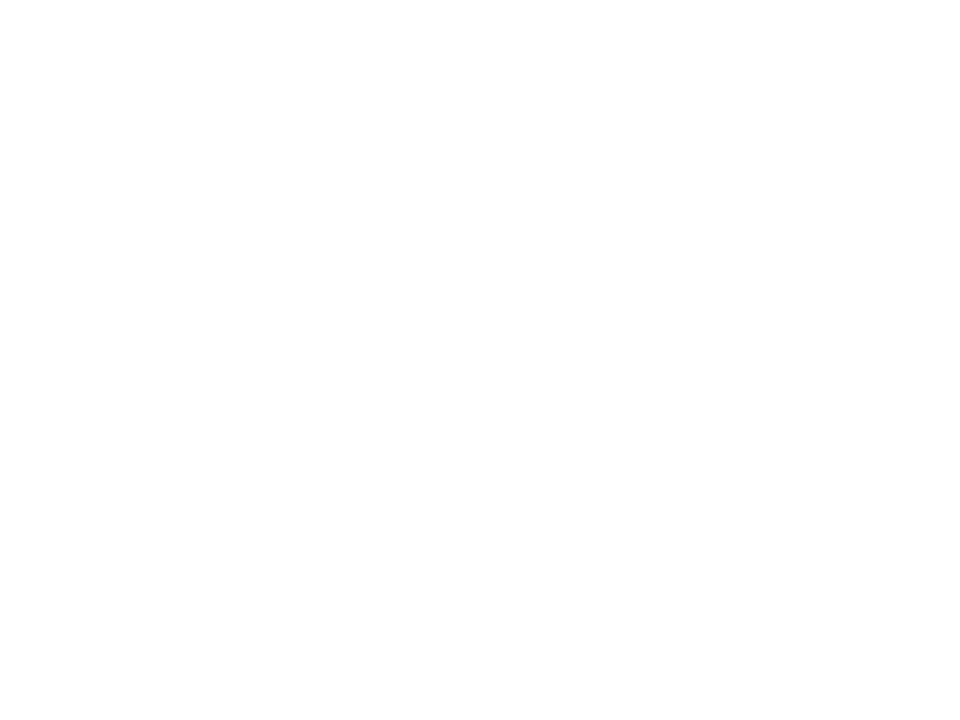

In [29]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plt.xlim(0, 50)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Exoplanet Dataset Explained Variance')
plt.show()

<IPython.core.display.Javascript object>


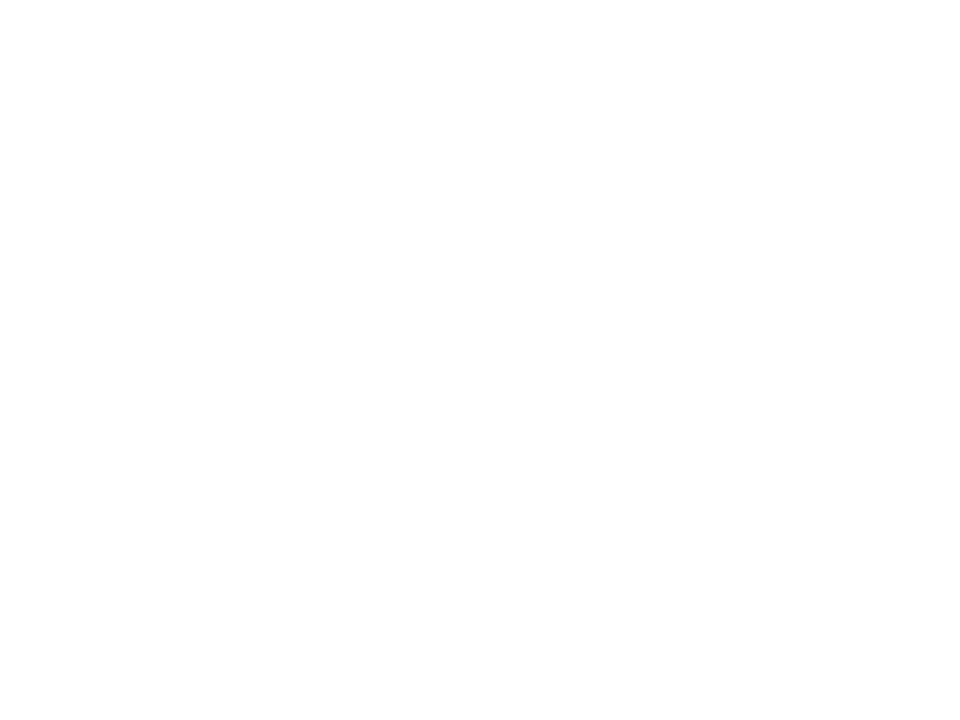

In [30]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0, 50)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Exoplanet Dataset Explained Variance')
plt.show()

<IPython.core.display.Javascript object>


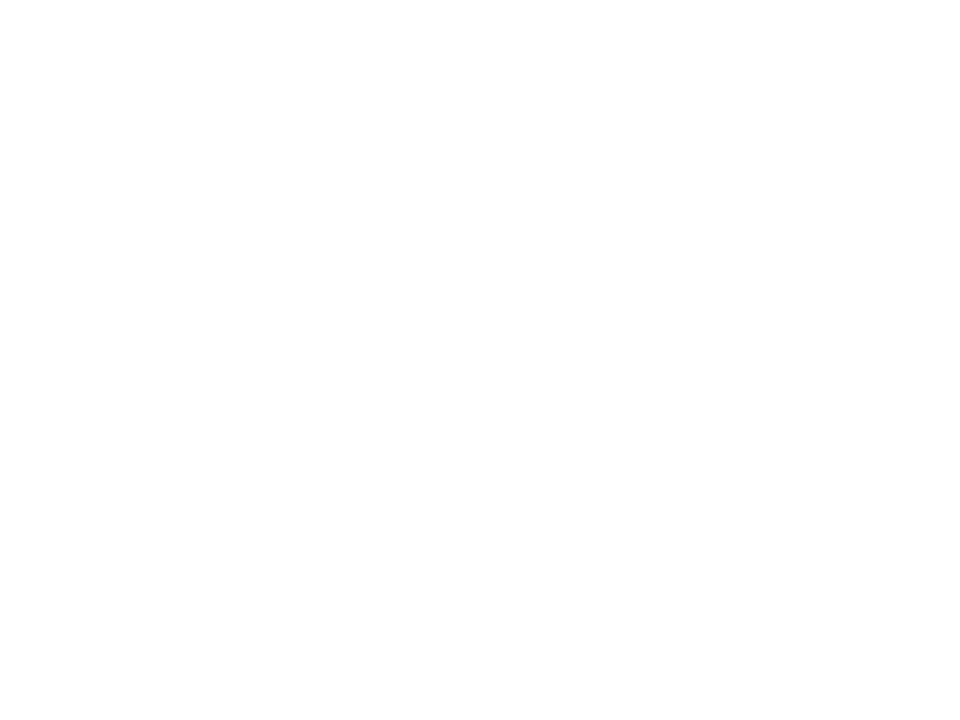

In [31]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0, 15)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Exoplanet Dataset Explained Variance')
plt.show()

In [32]:
pca = PCA(n_components=13)
dataset = pca.fit_transform(data_rescaled)
pc_num = pca.n_components

In [33]:
pc_features = []

for k in range(1,pc_num+1):
    s = 'Principal Component ' + str(k)
    pc_features.append(s)
pc_features

['Principal Component 1',
 'Principal Component 2',
 'Principal Component 3',
 'Principal Component 4',
 'Principal Component 5',
 'Principal Component 6',
 'Principal Component 7',
 'Principal Component 8',
 'Principal Component 9',
 'Principal Component 10',
 'Principal Component 11',
 'Principal Component 12',
 'Principal Component 13']

In [34]:
pdf = pd.DataFrame(data = dataset, columns = pc_features)
pdf.head(6)

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,Principal Component 11,Principal Component 12,Principal Component 13
0,-0.016807,0.002498,-0.004463,0.000274,-0.001126,-0.004420,-0.001719,0.000390,-0.001607,-0.001598,-0.000669,0.000791,-0.001259
1,-0.016386,0.001697,-0.005036,-0.000278,-0.001580,-0.003078,-0.001067,0.001452,-0.001314,-0.002152,-0.000431,-0.000895,-0.001290
2,-0.018981,-0.001057,-0.007690,-0.004413,-0.001871,-0.002014,-0.000403,0.004774,-0.000396,-0.001964,-0.000111,0.000298,-0.001592
3,-0.016683,0.001342,-0.005469,-0.000945,-0.002004,-0.002803,-0.000603,0.001902,-0.000851,-0.002249,-0.000228,-0.001702,-0.001414
4,-0.022657,0.002994,0.001300,0.007590,-0.001723,-0.006909,-0.003682,0.003525,-0.002471,-0.002282,0.002176,0.001780,-0.001369
5,-0.012728,-0.000648,-0.002591,0.004009,-0.002760,-0.003955,-0.001092,0.003906,-0.001064,-0.002633,-0.002302,0.001005,-0.002137


In [35]:
pdf_train = pd.concat([df[['LABEL']], pdf], axis = 1)
pdf_train = pdf_train.replace(1,'Non-Exoplanet')
pdf_train = pdf_train.replace(2,'Exoplanet')
pdf_train.head(6)

,LABEL,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,Principal Component 11,Principal Component 12,Principal Component 13
0,Exoplanet,-0.016807,0.002498,-0.004463,0.000274,-0.001126,-0.004420,-0.001719,0.000390,-0.001607,-0.001598,-0.000669,0.000791,-0.001259
1,Exoplanet,-0.016386,0.001697,-0.005036,-0.000278,-0.001580,-0.003078,-0.001067,0.001452,-0.001314,-0.002152,-0.000431,-0.000895,-0.001290
2,Exoplanet,-0.018981,-0.001057,-0.007690,-0.004413,-0.001871,-0.002014,-0.000403,0.004774,-0.000396,-0.001964,-0.000111,0.000298,-0.001592
3,Exoplanet,-0.016683,0.001342,-0.005469,-0.000945,-0.002004,-0.002803,-0.000603,0.001902,-0.000851,-0.002249,-0.000228,-0.001702,-0.001414
4,Exoplanet,-0.022657,0.002994,0.001300,0.007590,-0.001723,-0.006909,-0.003682,0.003525,-0.002471,-0.002282,0.002176,0.001780,-0.001369
5,Exoplanet,-0.012728,-0.000648,-0.002591,0.004009,-0.002760,-0.003955,-0.001092,0.003906,-0.001064,-0.002633,-0.002302,0.001005,-0.002137


In [36]:
var_ratio = pca.explained_variance_ratio_
var_sum = sum(var_ratio)
print(var_ratio)
print(np.cumsum(var_ratio))
print("Total explained variance: = {0:f}%".format(var_sum))

[0.32134371 0.18972341 0.13734821 0.09396398 0.05492381 0.04224889
 0.03495183 0.0306029  0.02272865 0.0186392  0.01108179 0.00801271
 0.00739489]
[0.32134371 0.51106713 0.64841533 0.74237932 0.79730313 0.83955202
 0.87450385 0.90510675 0.9278354  0.9464746  0.95755638 0.9655691
 0.97296398]
Total explained variance: = 0.972964%


<IPython.core.display.Javascript object>


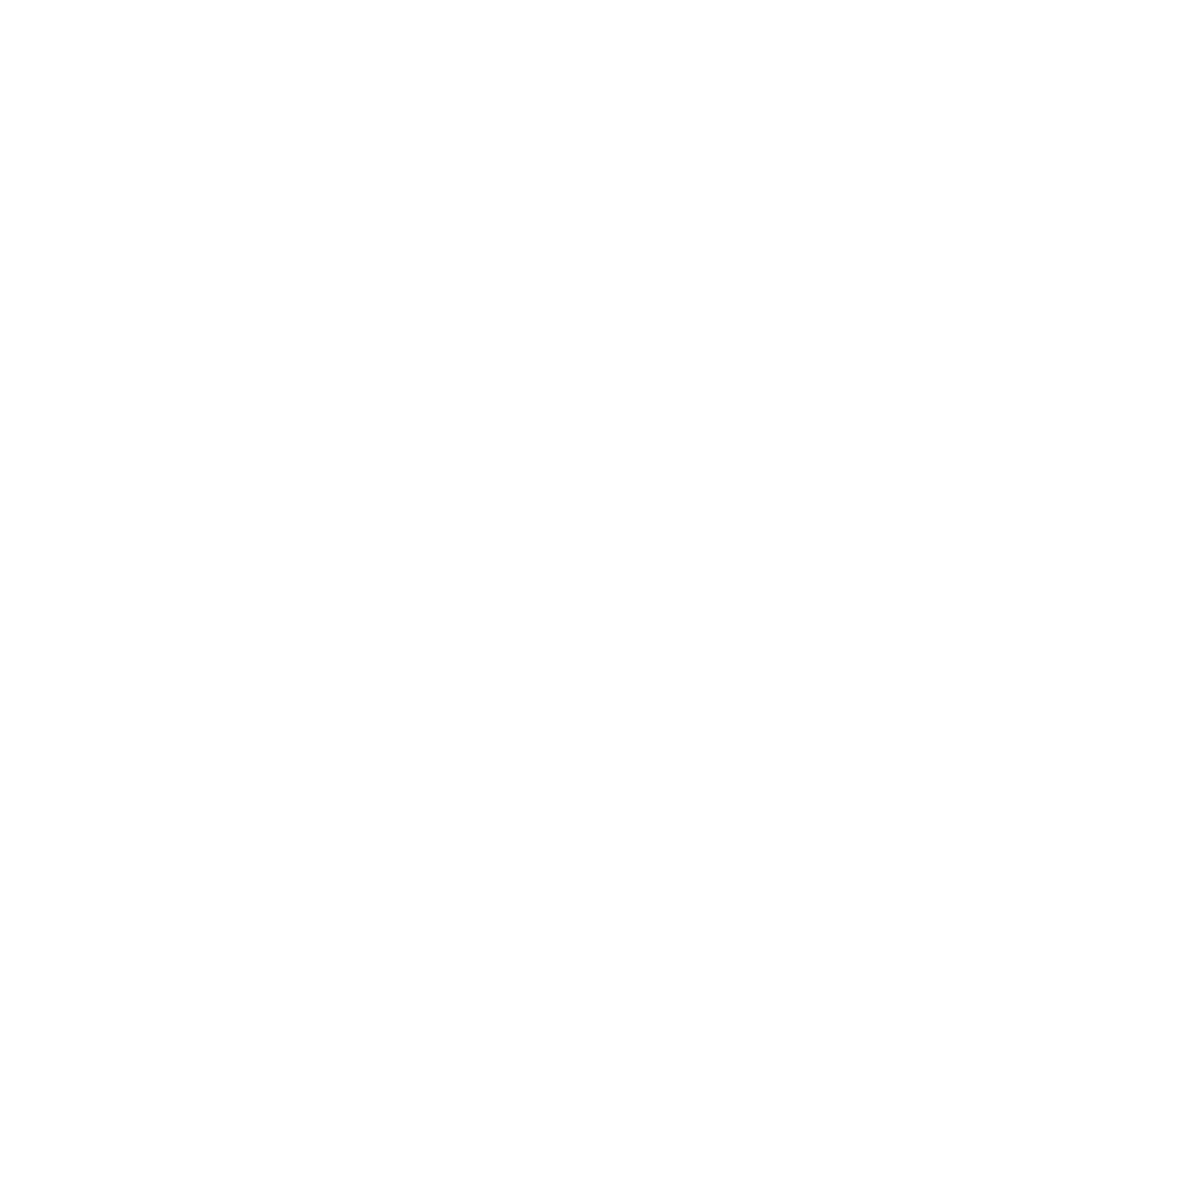

In [37]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')

labels = ['Non-Exoplanet','Exoplanet']
colors = ['r', 'g', 'b']
for label, color in zip(labels,colors):
    indicesToKeep = pdf_train['LABEL'] == label
    ax.scatter(pdf_train.loc[indicesToKeep, 'Principal Component 1']
              , pdf_train.loc[indicesToKeep, 'Principal Component 2']
              , pdf_train.loc[indicesToKeep, 'Principal Component 3']
              , label = label
              , c = color
              , s = 50)

ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_zlabel('PC 3', fontsize = 15)
ax.set_title('First 3 Components PCA', fontsize = 20)
ax.legend(labels)
ax.grid()

In [38]:
df_test = pd.read_csv("/Users/Nik Hadri Mahmod/Documents/Search of Exoplanets/exoTest.csv")
df_test.head(6)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,2,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,2,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,2,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84
5,1,14.28,10.63,14.56,12.42,12.07,12.92,12.27,3.19,8.47,...,3.86,-4.06,-3.56,-1.13,-7.18,-4.78,-4.34,7.67,-0.33,-7.53


In [39]:
x_test = df_test.iloc[:,1:].values
X_test_t = x_test
print(X_test_t.shape)

(570, 3197)


In [40]:
scaler = MinMaxScaler(feature_range=[0,1])
from sklearn.preprocessing import StandardScaler
scaler_final = StandardScaler()
X_t = x_train
print(X_t.shape)
#scaler_final.fit_transform(X_t)

#scaler_final

(5087, 3197)


In [41]:
X_demo = np.array([[2, 0, 3],
                  [1, 1, 1],
                  [0, 2, 0]])
X_demo

array([[2, 0, 3],
       [1, 1, 1],
       [0, 2, 0]])

In [42]:
first_row = X_demo[0,:]
print(first_row.mean())
print(first_row.std())
print((2-X_demo.mean())/X_demo.std())



1.6666666666666667
1.247219128924647
0.8944271909999157


In [43]:
first_column = X_demo[:,2]
print(first_column.mean())
print(first_column.std())
print((0-first_column.mean())/first_column.std())

1.3333333333333333
1.247219128924647
-1.0690449676496976


In [44]:
scaler_demo = StandardScaler()
data_demo = scaler_demo.fit_transform(X_demo)
data_demo

C:\Users\Nik Hadri Mahmod\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Nik Hadri Mahmod\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 1.22474487, -1.22474487,  1.33630621],
       [ 0.        ,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [45]:
data_rescaled_t = scaler.fit_transform(X_t)
print(data_rescaled_t[0,:])
print(data_rescaled_t.shape)
print(scaler.scale_)

[0.13673478 0.17838747 0.16207309 ... 0.77224094 0.77152869 0.75266417]
(5087, 3197)
[5.99845206e-07 5.65367905e-07 5.70635955e-07 ... 1.05487680e-06
 1.10061612e-06 1.17031336e-06]


In [46]:
data_test_rescaled = scaler.transform(X_test_t)
print(data_rescaled_t.shape)

(5087, 3197)


In [47]:
pca = PCA().fit(data_rescaled_t)

<IPython.core.display.Javascript object>


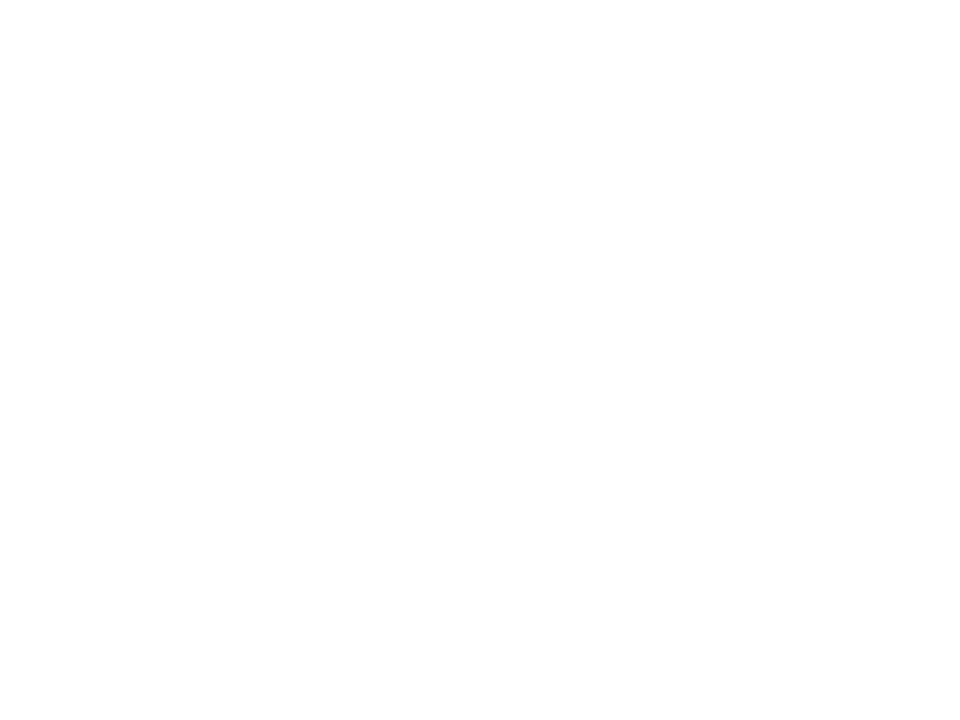

In [48]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plt.xlim(0, 50)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Exoplanet Dataset Explained Variance')
plt.show()

<IPython.core.display.Javascript object>


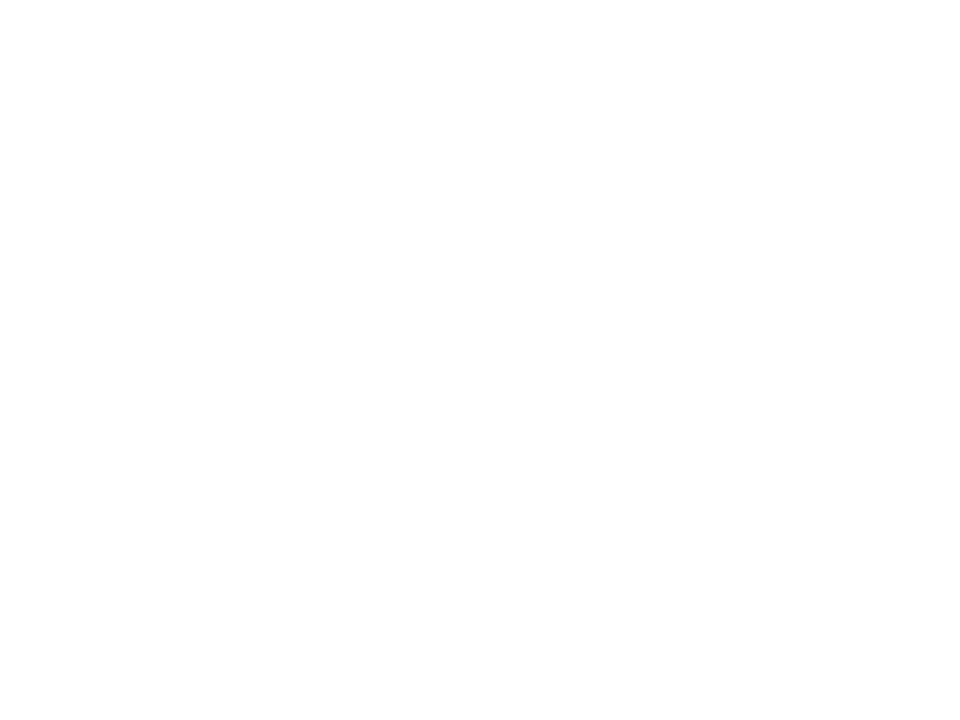

In [49]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0, 50)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Exoplanet Dataset Explained Variance')
plt.show()

<IPython.core.display.Javascript object>


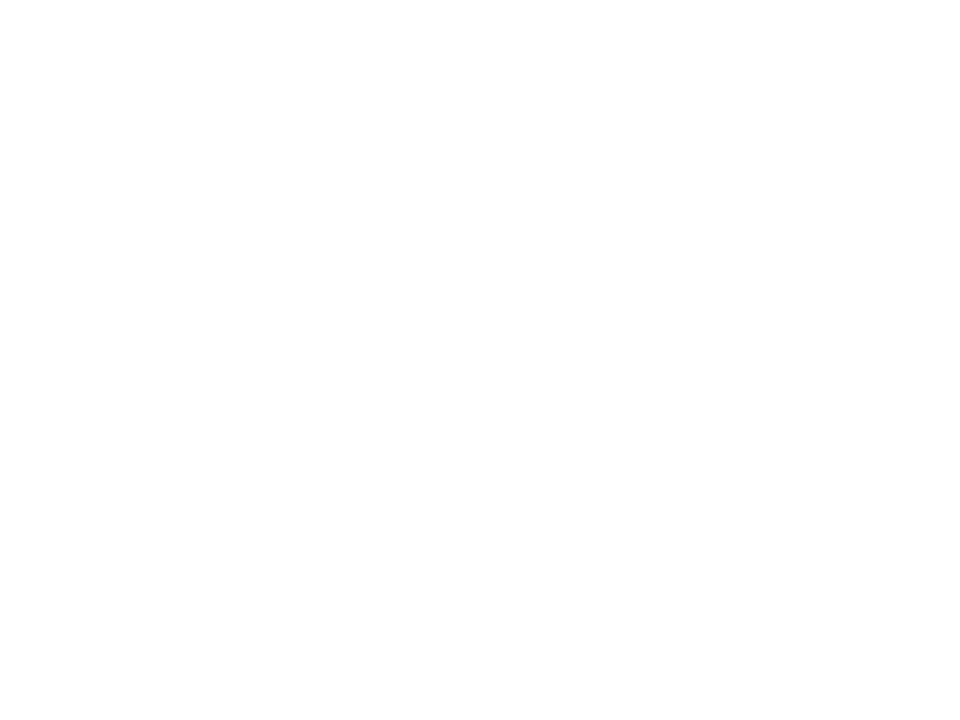

In [50]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0, 15)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Exoplanet Dataset Explained Variance')
plt.show()

In [51]:
print(data_rescaled_t)
pca = PCA(n_components=13)
dataset = pca.fit_transform(data_rescaled_t)
dataset_test = pca.transform(data_test_rescaled)
pc_num = pca.n_components
dataset.shape

[[0.13673478 0.17838747 0.16207309 ... 0.77224094 0.77152869 0.75266417]
 [0.13665516 0.17832096 0.16202821 ... 0.77218296 0.77154071 0.75273377]
 [0.13699799 0.17864307 0.16235477 ... 0.77214565 0.77144603 0.75259731]
 ...
 [0.13684248 0.17849725 0.16221097 ... 0.77226942 0.77161012 0.7528034 ]
 [0.13668078 0.17834126 0.16205974 ... 0.7721608  0.77151604 0.75270746]
 [0.1368724  0.17851329 0.1622289  ... 0.77215851 0.77150759 0.752743  ]]


(5087, 13)

In [52]:
var_ratio = pca.explained_variance_ratio_
var_sum = sum(var_ratio)
print(var_ratio)
print(np.cumsum(var_ratio))
print("Total explained variance: = {0:f}%".format(var_sum))

[0.32134371 0.18972341 0.13734821 0.09396398 0.05492381 0.04224889
 0.03495183 0.0306029  0.02272865 0.0186392  0.01108179 0.00801271
 0.00739489]
[0.32134371 0.51106713 0.64841533 0.74237932 0.79730313 0.83955202
 0.87450385 0.90510675 0.9278354  0.9464746  0.95755638 0.9655691
 0.97296398]
Total explained variance: = 0.972964%


In [53]:
pc_features = []

for k in range(1,pc_num+1):
    s = 'Principal Component ' + str(k)
    pc_features.append(s)
pc_features

['Principal Component 1',
 'Principal Component 2',
 'Principal Component 3',
 'Principal Component 4',
 'Principal Component 5',
 'Principal Component 6',
 'Principal Component 7',
 'Principal Component 8',
 'Principal Component 9',
 'Principal Component 10',
 'Principal Component 11',
 'Principal Component 12',
 'Principal Component 13']

In [54]:
#pca = PCA().fit_transform(data_rescaled_t)

In [55]:
pdf_final = pd.DataFrame(data = dataset, columns = pc_features)
pdf_final.head(6)

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,Principal Component 11,Principal Component 12,Principal Component 13
0,-0.016807,0.002498,-0.004463,0.000274,-0.001126,-0.004420,-0.001719,0.000390,-0.001607,-0.001598,-0.000669,0.000791,-0.001259
1,-0.016386,0.001697,-0.005036,-0.000278,-0.001580,-0.003078,-0.001067,0.001452,-0.001314,-0.002152,-0.000431,-0.000895,-0.001290
2,-0.018981,-0.001057,-0.007690,-0.004413,-0.001871,-0.002014,-0.000403,0.004774,-0.000396,-0.001964,-0.000111,0.000298,-0.001592
3,-0.016683,0.001342,-0.005469,-0.000945,-0.002004,-0.002803,-0.000603,0.001902,-0.000851,-0.002249,-0.000228,-0.001702,-0.001414
4,-0.022657,0.002994,0.001300,0.007590,-0.001723,-0.006909,-0.003682,0.003525,-0.002471,-0.002282,0.002176,0.001780,-0.001369
5,-0.012728,-0.000648,-0.002591,0.004009,-0.002760,-0.003955,-0.001092,0.003906,-0.001064,-0.002633,-0.002302,0.001005,-0.002137


In [56]:
pdf_final = pd.concat([df[['LABEL']], pdf_final], axis = 1)

In [57]:
pdf_final = pdf_final.replace(1,'Non-Exoplanet')
pdf_final = pdf_final.replace(2,'Exoplanet')
print(pdf_final.shape)
pdf_final.head(6)

(5087, 14)


,LABEL,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,Principal Component 11,Principal Component 12,Principal Component 13
0,Exoplanet,-0.016807,0.002498,-0.004463,0.000274,-0.001126,-0.004420,-0.001719,0.000390,-0.001607,-0.001598,-0.000669,0.000791,-0.001259
1,Exoplanet,-0.016386,0.001697,-0.005036,-0.000278,-0.001580,-0.003078,-0.001067,0.001452,-0.001314,-0.002152,-0.000431,-0.000895,-0.001290
2,Exoplanet,-0.018981,-0.001057,-0.007690,-0.004413,-0.001871,-0.002014,-0.000403,0.004774,-0.000396,-0.001964,-0.000111,0.000298,-0.001592
3,Exoplanet,-0.016683,0.001342,-0.005469,-0.000945,-0.002004,-0.002803,-0.000603,0.001902,-0.000851,-0.002249,-0.000228,-0.001702,-0.001414
4,Exoplanet,-0.022657,0.002994,0.001300,0.007590,-0.001723,-0.006909,-0.003682,0.003525,-0.002471,-0.002282,0.002176,0.001780,-0.001369
5,Exoplanet,-0.012728,-0.000648,-0.002591,0.004009,-0.002760,-0.003955,-0.001092,0.003906,-0.001064,-0.002633,-0.002302,0.001005,-0.002137


In [58]:
var_ratio = pca.explained_variance_ratio_
var_sum = sum(var_ratio)
print(var_ratio)
print(np.cumsum(var_ratio))
print("Total explained variance: = {0:f}%".format(var_sum))

[0.32134371 0.18972341 0.13734821 0.09396398 0.05492381 0.04224889
 0.03495183 0.0306029  0.02272865 0.0186392  0.01108179 0.00801271
 0.00739489]
[0.32134371 0.51106713 0.64841533 0.74237932 0.79730313 0.83955202
 0.87450385 0.90510675 0.9278354  0.9464746  0.95755638 0.9655691
 0.97296398]
Total explained variance: = 0.972964%


First 3 Principal Components yield 87.58% of the information given 
PC 1 yields 85.97%, PC 2 yields 0.10%, and PC 3 yields 0.057% of the information

<IPython.core.display.Javascript object>


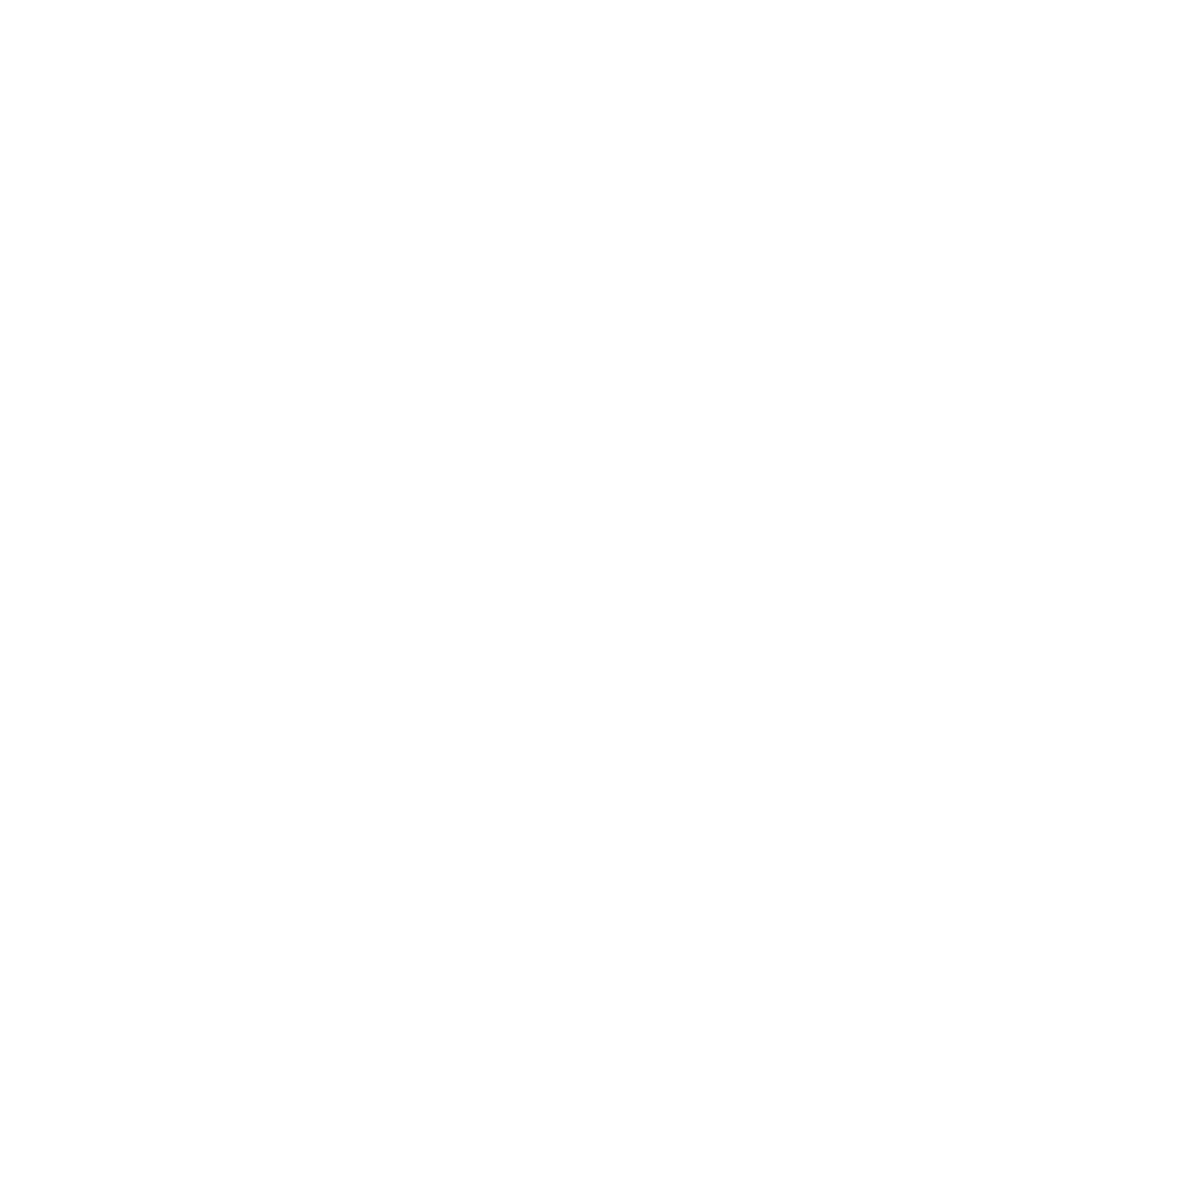

In [59]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')

labels = ['Non-Exoplanet','Exoplanet']
colors = ['r', 'g', 'b']
for label, color in zip(labels,colors):
    indicesToKeep = pdf_final['LABEL'] == label
    ax.scatter(pdf_final.loc[indicesToKeep, 'Principal Component 1']
              , pdf_final.loc[indicesToKeep, 'Principal Component 2']
              , pdf_final.loc[indicesToKeep, 'Principal Component 3']
              , label = label
              , c = color
              , s = 50)

ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_zlabel('PC 3', fontsize = 15)
ax.set_title('First 3 Components PCA', fontsize = 20)
ax.legend(labels)
ax.grid()

In [60]:
target_label = df_test['LABEL']
#target_label
#target_label.replace(1,'Non-Exoplanet')
#target_label.replace(2,'Exoplanet')

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [62]:
#cross_val_score(LogisticRegression(), dataset, pdf_final['LABEL'])

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [65]:
logisticRegr.fit(dataset, pdf_final['LABEL'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [66]:
predicted = logisticRegr.predict(dataset_test)

In [67]:
df_test = df_test.replace(1,'Non-Exoplanet')
df_test = df_test.replace(2,'Exoplanet')

In [68]:
logisticRegr.score(dataset_test, df_test['LABEL'])

0.9912280701754386

In [69]:
#cross_val_score(LogisticRegression(solver = 'lbfgs'), dataset, pdf_final['LABEL'])

In [70]:
actual = df_test['LABEL']

In [71]:
target_actual = pd.Series(actual, name='Actual')
target_predicted = pd.Series(predicted, name='Predicted')
df_confusion = pd.crosstab(target_actual, target_predicted)

In [72]:
df_confusion

Predicted,Non-Exoplanet
Actual,
Exoplanet,5
Non-Exoplanet,565


In [73]:
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(target_actual, target_predicted)

In [74]:
svcModel = SVC(kernel='linear', C=1)
predicted = svcModel.fit(dataset, pdf_final['LABEL'])
svc_predicted = svcModel.predict(dataset_test)

In [75]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

In [76]:
print ('Accuracy:', accuracy_score(actual, svc_predicted))
print ('F1 score:', f1_score(actual, svc_predicted,pos_label='Exoplanet'))
print ('Recall:', recall_score(actual, svc_predicted,pos_label='Exoplanet'))
print ('Precision:', precision_score(actual, svc_predicted, pos_label='Exoplanet'))
print ('\n clasification report:\n', classification_report(actual, svc_predicted))
print ('\n confussion matrix:\n',confusion_matrix(actual, svc_predicted))

Accuracy: 0.9912280701754386
F1 score: 0.0
Recall: 0.0
Precision: 0.0

 clasification report:
                precision    recall  f1-score   support

    Exoplanet       0.00      0.00      0.00         5
Non-Exoplanet       0.99      1.00      1.00       565

    micro avg       0.99      0.99      0.99       570
    macro avg       0.50      0.50      0.50       570
 weighted avg       0.98      0.99      0.99       570


 confussion matrix:
 [[  0   5]
 [  0 565]]


C:\Users\Nik Hadri Mahmod\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Nik Hadri Mahmod\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Nik Hadri Mahmod\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [77]:
target_actual = pd.Series(actual, name='Actual')
target_predicted = pd.Series(predicted, name='Predicted')
df_confusion = pd.crosstab(target_actual, target_predicted)

In [78]:
df_confusion

Predicted,"SVC(C=1, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma='auto_deprecated', kernel='linear', max_iter=-1, probability=False, random_state=None, shrinking=True, tol=0.001, verbose=False)"
Actual,
Exoplanet,1


# PCA Projection to 2D

## Visualize 2D Projection

These two principle components only contain 49.91% of the information. The first and second principal contain 27.37% and 22.54% of the variance respectively. The rest is contained in the third and fourth principal component.

In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [80]:
cross_val_score(LogisticRegression(), pc_norm, train_label)

NameError: name 'pc_norm' is not defined

In [ ]:
cross_val_score(SVC(), pc_norm, train_label)